In [1]:
import anfis
import membership.mfDerivs
import membership.membershipfunction
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('iris-setosa.csv')

df = df.sample(frac=1)


X = df.iloc[:, 1:3].values
Y = df.iloc[:,0].values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y)

In [3]:
mf = [[['gaussmf',{'mean':0.,'sigma':1.}],['gaussmf',{'mean':-1.,'sigma':2.}],
       ['gaussmf',{'mean':-4.,'sigma':10.}],['gaussmf',{'mean':-7.,'sigma':7.}]],
            [['gaussmf',{'mean':1.,'sigma':2.}],['gaussmf',{'mean':2.,'sigma':3.}],
             ['gaussmf',{'mean':-2.,'sigma':10.}],['gaussmf',{'mean':-10.5,'sigma':5.}]]]

In [4]:
mfc = membership.membershipfunction.MemFuncs(mf)
anf = anfis.ANFIS(X, Y, mfc)

In [5]:
anf.trainHybridJangOffLine(epochs=20)

current error: 3.6470482735661585
current error: 3.6443938897274455
current error: 3.641741412755519
current error: 3.63908955169925
current error: 3.63617106109139
current error: 3.6329571945113543
current error: 3.6294153489313152
current error: 3.625508305817829
current error: 3.6211932650401923
current error: 3.6164206057609953
current error: 3.6111322866605313
current error: 3.6052597708113217
current error: 3.598721329045543
current error: 3.5914185485837447
current error: 3.58323187649781
current error: 3.574015134647626
current error: 3.5635893568159887
current error: 3.5517375621616543
current error: 3.538205608243148


array([[-6.31290861e-02],
       [-9.79533041e-02],
       [-7.13744547e-02],
       [-6.78301159e-02],
       [ 7.85588438e-01],
       [ 1.00511524e+00],
       [ 5.16936551e-02],
       [-6.07305525e-02],
       [-2.31753110e-02],
       [ 1.29482491e+00],
       [-5.73597735e-02],
       [ 1.29972518e+00],
       [ 1.19603945e+00],
       [ 9.78556662e-02],
       [ 1.01463899e-01],
       [-3.26509731e-02],
       [-2.14743196e-02],
       [-1.77186886e-02],
       [-9.45075079e-02],
       [-5.87928461e-02],
       [-3.26509731e-02],
       [ 6.68706448e-02],
       [ 6.03082443e-01],
       [ 9.57226762e-01],
       [ 3.25256882e-02],
       [-9.00237011e-02],
       [ 9.57226762e-01],
       [ 2.56432390e-02],
       [ 1.11879154e+00],
       [ 7.62161382e-01],
       [ 1.32056311e-01],
       [-9.60156367e-02],
       [-6.86685026e-02],
       [ 9.50334312e-01],
       [-2.45031402e-02],
       [-8.81269048e-02],
       [ 2.45836459e-01],
       [-6.62133695e-02],
       [ 1.9

In [6]:
print(round(anf.consequents[-1][0],6))
print(round(anf.consequents[-2][0],6))

0.101335
0.2267


In [7]:
print(round(anf.fittedValues[9][0],6))

1.294825


In [8]:
anf.plotErrors()         #capire che tipo di errore sta plottando

<Figure size 640x480 with 1 Axes>

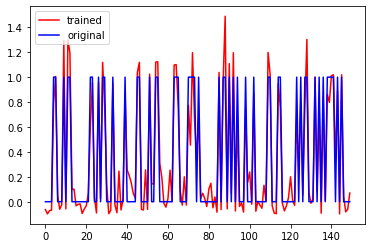

In [9]:
anf.plotResults()      # in ascissa = righe del dataframe; 
                       # in ordinata = valori della membership (rosso = dopo aver fatto training, blu = y originale cioè 1 o 0)

In [15]:


anfis.predict(anf, xTest)

In [17]:
(a, yTest)

(array([[ 1.32056311e-01],
        [-5.24110111e-02],
        [ 7.62161382e-01],
        [ 3.55269614e-01],
        [-3.85613367e-02],
        [ 6.97679002e-02],
        [ 2.00304918e-01],
        [ 1.94414206e-02],
        [ 3.25256882e-02],
        [ 9.57226762e-01],
        [ 4.30912775e-02],
        [-7.13744547e-02],
        [ 2.53084792e-01],
        [ 1.94326044e-01],
        [ 1.32056311e-01],
        [-4.35126026e-02],
        [-7.43141627e-02],
        [ 2.55084358e-01],
        [ 2.56432390e-02],
        [ 2.56432390e-02],
        [-9.00237011e-02],
        [ 1.10858064e+00],
        [ 4.68713178e-04],
        [-1.77186886e-02],
        [-6.63596475e-02],
        [-2.70439513e-02],
        [ 6.68706448e-02],
        [ 1.12071675e+00],
        [-3.81048425e-02],
        [-3.26509731e-02],
        [ 1.01463899e-01],
        [ 6.68706448e-02],
        [-2.93854586e-02],
        [-7.63099641e-02],
        [ 6.58290999e-01],
        [ 7.96933868e-01],
        [-3.26509731e-02],
 

In [20]:
anf.plotMF(xTest, y)

IndexError: list index out of range